In [47]:
import pandas as pd
import os

path = "/home/rupnik/macocu/task8/voxpopuli/hr/"
all_oggs =  []
for root, dirs, files in os.walk(path):
    for name in files:
        if name.endswith(".ogg"):
            all_oggs.append(name)



def has_diacritics(s):
    import re
    pattern = "[šđčćž]"
    p = re.compile(pattern)
    try:
        return p.search(s.lower()) is not None
    except:
        return False
def assign_path(s):
    year = s[0:4]
    return os.path.join(
        path,
        year,
        s+".ogg"
    )

train = pd.read_csv("voxpopuli/hr/asr_train.tsv", sep="\t")
train["filename"] = train.id + ".ogg"
train["raw_has_diacritics"] = train.raw_text.apply(has_diacritics)
train["path"] = train.id.apply(assign_path)

test = pd.read_csv("voxpopuli/hr/asr_test.tsv", sep="\t")
test["filename"] = test.id + ".ogg"
test["raw_has_diacritics"] = test.raw_text.apply(has_diacritics)
test["path"] = test.id.apply(assign_path)

dev = pd.read_csv("voxpopuli/hr/asr_dev.tsv", sep="\t")
dev["filename"] = dev.id + ".ogg"
dev["raw_has_diacritics"] = dev.raw_text.apply(has_diacritics)
dev["path"] = dev.id.apply(assign_path)


train.head()

,id,raw_text,normalized_text,speaker_id,split,gender,is_gold_transcript,accent,filename,raw_has_diacritics,path
0,20181004-0900-PLENARY-hr_20181004-11:56:22_4,NaN,mislim kad bi se radilo o nekoj drugoj zemlji o milijun ljudi koji su zatoeni itekako bi se svi ...,119434,train,female,False,None,20181004-0900-PLENARY-hr_20181004-11:56:22_4.ogg,False,/home/rupnik/macocu/task8/voxpopuli/hr/2018/20181004-0900-PLENARY-hr_20181004-11:56:22_4.ogg
1,20181004-0900-PLENARY-hr_20181004-11:56:22_5,NaN,pozdravljam rezoluciju i nadam se da e ona bar malo doprinijeti da se ti jadni ljudi oslobode.,119434,train,female,False,None,20181004-0900-PLENARY-hr_20181004-11:56:22_5.ogg,False,/home/rupnik/macocu/task8/voxpopuli/hr/2018/20181004-0900-PLENARY-hr_20181004-11:56:22_5.ogg
2,20131120-0900-PLENARY-3-hr_20131120-10:48:47_0,NaN,poljoprivreda je grana od iznimne vanosti za sve drave lanice pa tako i za hrvatsku.,119431,train,female,False,None,20131120-0900-PLENARY-3-hr_20131120-10:48:47_0.ogg,False,/home/rupnik/macocu/task8/voxpopuli/hr/2013/20131120-0900-PLENARY-3-hr_20131120-10:48:47_0.ogg
3,20131120-0900-PLENARY-3-hr_20131120-10:48:47_1,NaN,od dana pristupanja europskoj uniji tradicionalni nazivi nekoliko hrvatskih vina dovedeni su u p...,119431,train,female,False,None,20131120-0900-PLENARY-3-hr_20131120-10:48:47_1.ogg,False,/home/rupnik/macocu/task8/voxpopuli/hr/2013/20131120-0900-PLENARY-3-hr_20131120-10:48:47_1.ogg
4,20131120-0900-PLENARY-3-hr_20131120-10:48:47_2,"naglasiti da hrvatska vina imaju dugu tradiciju, jedinstvena su okusom i dio su hrvatskog nacion...",elim naglasiti da hrvatska vina imaju dugu tradiciju jedinstvena su okusom i dio su hrvatskog na...,119431,train,male,False,None,20131120-0900-PLENARY-3-hr_20131120-10:48:47_2.ogg,False,/home/rupnik/macocu/task8/voxpopuli/hr/2013/20131120-0900-PLENARY-3-hr_20131120-10:48:47_2.ogg


In [48]:
train.shape[0], dev.shape[0], test.shape[0]

(10987, 1285, 666)

In [49]:
all(train.filename.isin(all_oggs)), all(test.filename.isin(all_oggs)), all(dev.filename.isin(all_oggs))

(True, True, True)

All instances have the files present. How many of the instances do not have raw_text?:

In [50]:
train.dropna().shape[0],dev.dropna().shape[0], test.dropna().shape[0]

(5803, 789, 334)

And even stricter: how many instances satisfy the diacritics test on raw text?

In [51]:
train[train.raw_has_diacritics].shape[0], dev[dev.raw_has_diacritics].shape[0], test[test.raw_has_diacritics].shape[0]

(5224, 740, 305)

In [52]:
pd.set_option('max_colwidth', 100)

train.dropna()["normalized_text"]

4        elim naglasiti da hrvatska vina imaju dugu tradiciju jedinstvena su okusom i dio su hrvatskog na...
14                                                                       jer ih je upravo toliko izlovljeno.
21       gospođo predsjednice nekad su učitelji bili jedan od glavnih stupova društva cijenjeni zbog svoj...
22       danas ih sustav javnog obrazovanja nažalost prečesto tretira kao obične birokratske ispostave i ...
23       nekim je državama članicama uključujući hrvatsku prioritet zadovoljiti formu pa i nauštrb kvalit...
                                                        ...                                                 
10982                                   naravno moguće je reći da u tom smislu ovo izvješće dolazi prekasno.
10983    vanjska politika europske unije i njena trgovinska politika trebaju služiti ostvarenju njezinih ...
10984    ako je to tako a jest onda tomu pogotovo treba služiti politika izvoza oružja zemalja članica eu...
10985    ali i na t

In [62]:

from pydub import AudioSegment

audio = AudioSegment.from_ogg(train.path[0])
len(audio)/1000
def get_duration_and_convert(path):
    from pydub import AudioSegment
    aseg = AudioSegment.from_ogg(path)
    aseg.export(path.replace(".ogg", ".wav"), format="wav", parameters = "-ac 1 -ar 16000".split())
    return len(aseg)/1000
def get_durations(series):
    from concurrent.futures import ProcessPoolExecutor
    with ProcessPoolExecutor(max_workers=60) as executor:
        results = list(executor.map(get_duration_and_convert, series))
    return results

train["duration"] = get_durations(train.path)
dev["duration"] = get_durations(dev.path)
test["duration"] = get_durations(test.path)

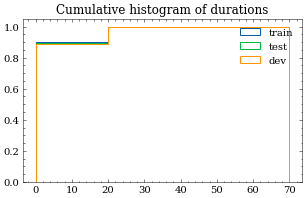

In [80]:
import matplotlib.pyplot as plt
plt.style.use("science,no-latex".split(","))
plt.figure(figsize=(5,3))
plt.hist(train.duration, bins=[0, 20, 70], density=True, label="train", histtype="step", cumulative=True)
plt.hist(test.duration, bins=[0, 20, 70], density=True, label="test", histtype="step", cumulative=True)
plt.hist(dev.duration, bins=[0, 20, 70], density=True, label="dev", histtype="step", cumulative=True)
plt.legend()
plt.title("Cumulative histogram of durations")
plt.savefig("images/27_cumulative_hist_of_durations.png")
plt.show()


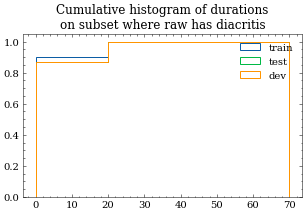

In [79]:
import matplotlib.pyplot as plt
plt.style.use("science,no-latex".split(","))
plt.figure(figsize=(5,3))
plt.hist(train.duration[train.raw_has_diacritics], bins=[0, 20, 70], density=True, label="train", histtype="step", cumulative=True)
plt.hist(test.duration[test.raw_has_diacritics], bins=[0, 20, 70], density=True, label="test", histtype="step", cumulative=True)
plt.hist(dev.duration[dev.raw_has_diacritics], bins=[0, 20, 70], density=True, label="dev", histtype="step", cumulative=True)
plt.legend()
plt.title("Cumulative histogram of durations\non subset where raw has diacritis")
plt.savefig("images/27_cumulative_hist_of_durations_where_raw_has_diacritics.png")
plt.show()

In [76]:
duration = train.duration.sum()+test.duration.sum()+dev.duration.sum()
duration/3600

41.31133777777779

In [78]:
for df in [train, dev, test]:
    df["wavpath"] = df.path.str.replace(".ogg", ".wav")

/tmp/ipykernel_1717877/3012997713.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df["wavpath"] = df.path.str.replace(".ogg", ".wav")


In [81]:
duration = train[train.raw_has_diacritics].duration.sum()+test[test.raw_has_diacritics].duration.sum()+dev[dev.raw_has_diacritics].duration.sum()
duration/3600

20.67472888888889

In [82]:
train.head(4)

,id,raw_text,normalized_text,speaker_id,split,gender,is_gold_transcript,accent,filename,raw_has_diacritics,path,duration,wavpath
0,20181004-0900-PLENARY-hr_20181004-11:56:22_4,NaN,mislim kad bi se radilo o nekoj drugoj zemlji o milijun ljudi koji su zatoeni itekako bi se svi ...,119434,train,female,False,None,20181004-0900-PLENARY-hr_20181004-11:56:22_4.ogg,False,/home/rupnik/macocu/task8/voxpopuli/hr/2018/20181004-0900-PLENARY-hr_20181004-11:56:22_4.ogg,19.984,/home/rupnik/macocu/task8/voxpopuli/hr/2018/20181004-0900-PLENARY-hr_20181004-11:56:22_4.wav
1,20181004-0900-PLENARY-hr_20181004-11:56:22_5,NaN,pozdravljam rezoluciju i nadam se da e ona bar malo doprinijeti da se ti jadni ljudi oslobode.,119434,train,female,False,None,20181004-0900-PLENARY-hr_20181004-11:56:22_5.ogg,False,/home/rupnik/macocu/task8/voxpopuli/hr/2018/20181004-0900-PLENARY-hr_20181004-11:56:22_5.ogg,6.520,/home/rupnik/macocu/task8/voxpopuli/hr/2018/20181004-0900-PLENARY-hr_20181004-11:56:22_5.wav
2,20131120-0900-PLENARY-3-hr_20131120-10:48:47_0,NaN,poljoprivreda je grana od iznimne vanosti za sve drave lanice pa tako i za hrvatsku.,119431,train,female,False,None,20131120-0900-PLENARY-3-hr_20131120-10:48:47_0.ogg,False,/home/rupnik/macocu/task8/voxpopuli/hr/2013/20131120-0900-PLENARY-3-hr_20131120-10:48:47_0.ogg,4.760,/home/rupnik/macocu/task8/voxpopuli/hr/2013/20131120-0900-PLENARY-3-hr_20131120-10:48:47_0.wav
3,20131120-0900-PLENARY-3-hr_20131120-10:48:47_1,NaN,od dana pristupanja europskoj uniji tradicionalni nazivi nekoliko hrvatskih vina dovedeni su u p...,119431,train,female,False,None,20131120-0900-PLENARY-3-hr_20131120-10:48:47_1.ogg,False,/home/rupnik/macocu/task8/voxpopuli/hr/2013/20131120-0900-PLENARY-3-hr_20131120-10:48:47_1.ogg,7.800,/home/rupnik/macocu/task8/voxpopuli/hr/2013/20131120-0900-PLENARY-3-hr_20131120-10:48:47_1.wav


In [86]:
tr = set(train[train.raw_has_diacritics].speaker_id.unique())
de = set(dev[dev.raw_has_diacritics].speaker_id.unique())
te = set(test[test.raw_has_diacritics].speaker_id.unique())

In [87]:
tr.intersection(de), tr.intersection(te)

(set(),
 {'112744',
  '112748',
  '112753',
  '112755',
  '112760',
  '119431',
  '119434',
  '119435',
  '119436',
  '119439',
  '124749',
  '124754',
  '124756',
  '185341'})

In [102]:
os.mkdir("vox_populi_dev")
def copydev(path):
    basename = os.path.basename(path)
    os.system(f"cp {path} vox_populi_dev/{basename}")


os.mkdir("vox_populi_test")
def copytest(path):
    basename = os.path.basename(path)
    os.system(f"cp {path} vox_populi_test/{basename}")


from concurrent.futures import ProcessPoolExecutor
with ProcessPoolExecutor(max_workers=60) as executor:
    executor.map(copydev, dev[dev.raw_has_diacritics].wavpath.values.tolist())
    executor.map(copytest, test[test.raw_has_diacritics].wavpath.values.tolist())




In [100]:
dev[dev.raw_has_diacritics].wavpath[0]

'/home/rupnik/macocu/task8/voxpopuli/hr/2017/20170704-0900-PLENARY-22-hr_20170704-23:04:39_1.wav'

In [101]:
os.path.basename(_)

'20170704-0900-PLENARY-22-hr_20170704-23:04:39_1.wav'